In [1]:
!pip install gym[classic_control]
!pip install tqdm
!pip install gym[box2d]

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import gym
import random
from tqdm import tqdm
import matplotlib.pyplot as plt 
import random
import math
# import progressbar
import time

/home/rahul/.local/lib/python3.6/site-packages/gym/core.py:26: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [3]:
env_name = "Acrobot-v1"
render_Mode = "human"
# env = gym.make(env_name)

In [4]:
def getAngle(cos_val, sin_val):   
    a_acos = math.acos(cos_val)
    angle = 0
    if sin_val < 0:
        angle = math.degrees(-a_acos) % 360
    else: 
        angle = math.degrees(a_acos)
    return angle

In [5]:
def transformObs(obs):
    ang1 = int(getAngle(obs[0], obs[1])/5)
    ang2 = int(getAngle(obs[2], obs[3])/5)
    new_obs = []
    new_obs.append(ang1)
    new_obs.append(ang2)
    new_obs.append(int((obs[4] + 12.57)))
    new_obs.append(int((obs[5] + 28.28)))
    return new_obs

In [6]:
pi = [[[[0 for _ in range(57)] for _ in range(26)] for _ in range(72)] for _ in range(72)]

In [7]:
val_func = [[[[0 for _ in range(57)] for _ in range(26)] for _ in range(72)] for _ in range(72)]

In [8]:
# q = [[[[[0 for _ in range(3)] for _ in range(7)] for _ in range(6)] for _ in range(6)] for _ in range(6)]

In [9]:
# vis = [[[[0 for _ in range(7)] for _ in range(6)] for _ in range(6)] for _ in range(6)]

In [10]:
next_state = [[[[[(-1, -1, -1, -1) for _ in range(3)] for _ in range(57)] for _ in range(26)] for _ in range(72)] for _ in range(72)]

In [11]:
gamma = 0.8
alpha = 0.8

In [12]:
def performEpisode():
    Acrobot = gym.make(env_name)
#     Acrobot = gym.make(env_name, render_mode=render_Mode)
    pre_obs = Acrobot.reset()
    
    pre_obs = transformObs(pre_obs)
    done = False
    tot_reward = 0
    while not done:
        a, b, c, d = int(pre_obs[0]), int(pre_obs[1]), int(pre_obs[2]), int(pre_obs[3])
        act = random.randint(0, 2) 
        pre_obs, reward, done, info = Acrobot.step(act)
        tot_reward += reward
        pre_obs = transformObs(pre_obs)
        a_n, b_n, c_n, d_n = int(pre_obs[0]), int(pre_obs[1]), int(pre_obs[2]), int(pre_obs[3])
        next_state[a][b][c][d][act] = (a_n, b_n, c_n, d_n)
        val_func[a][b][c][d] = val_func[a][b][c][d] + alpha*(reward + gamma*val_func[a_n][b_n][c_n][d_n] - val_func[a][b][c][d])
    Acrobot.close() 

In [13]:
def getReward():
    Acrobot = gym.make(env_name)
    pre_obs = Acrobot.reset() 
    pre_obs = transformObs(pre_obs)
    done = False
    tot_reward = 0
    while not done:
        a, b, c, d = int(pre_obs[0]), int(pre_obs[1]), int(pre_obs[2]), int(pre_obs[3])
        
        req_act = random.randint(0, 2)   
        max_val = -200000000000
        for act in range(0, 3):
            a_n, b_n, c_n, d_n = next_state[a][b][c][d][act]
            if a_n!=-1 and b_n!=-1 and c_n!=-1 and d_n!=-1:
                if val_func[a_n][b_n][c_n][d_n] >= max_val:
                    max_val = val_func[a_n][b_n][c_n][d_n]
                    req_act = act 
 
        pre_obs, reward, done, info = Acrobot.step(req_act)
        tot_reward += reward
        pre_obs = transformObs(pre_obs)   
    Acrobot.close() 
    return tot_reward

In [14]:
def get_policy():
    for i in range(72):
        for j in range(72):
            for v1 in range(26):
                for v2 in range(57):
                    max_val = -200000000000
                    req_act = -1
                    for act in range(0, 3):
                        a, b, c, d = next_state[i][j][v1][v2][act]
                        if a!=-1 and b!=-1 and c!=-1 and d!=-1:
                            if val_func[a][b][c][d] >= max_val:
                                max_val = val_func[a][b][c][d]
                                req_act = act
                    if req_act != -1:
                        pi[i][j][v1][v2] = req_act        

In [15]:
x_rew = []
avg_reww = []
orig_reww = []
for cnt in tqdm (range (200000), desc="Loading…", ascii=False, ncols=100):
    performEpisode()
    if cnt>0 and cnt%2000 == 0:
        rew = 0
        orig_reww.append(getReward())
        for _ in range(200):
            rew += getReward()
        avg_reww.append(rew/200)    
        x_rew.append(cnt/2000)

Loading…:   0%|                                                          | 0/200000 [00:00<?, ?it/s]/home/rahul/.local/lib/python3.6/site-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/home/rahul/.local/lib/python3.6/site-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=

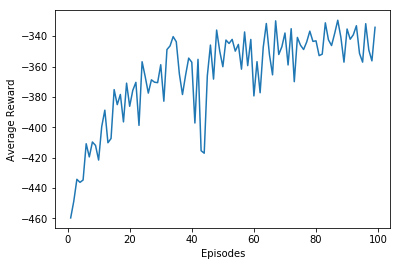

In [16]:
plt.plot(x_rew, avg_reww)
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.show()

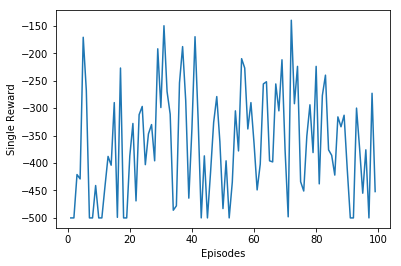

In [17]:
plt.plot(x_rew, orig_reww)
plt.xlabel("Episodes")
plt.ylabel("Single Reward")
plt.show()

In [18]:
get_policy()

In [19]:
Acrobot = gym.make(env_name)
# Acrobot = gym.make(env_name, render_mode=render_Mode)
pre_obs = Acrobot.reset() 
pre_obs = transformObs(pre_obs)
done = False
reward = 0
while not done:
    a, b, c, d = int(pre_obs[0]), int(pre_obs[1]), int(pre_obs[2]), int(pre_obs[3])
    act = pi[a][b][c][d]
    pre_obs, rew, done, info = Acrobot.step(act)
    pre_obs = transformObs(pre_obs)
    reward += rew
Acrobot.close()    
print(reward)    

-362.0


In [20]:
reward = 0
min_iter = 500
rew_list = []
success = 0
for _ in tqdm (range (1000), desc="Loading…", ascii=False, ncols=100):
    Acrobot = gym.make(env_name)
    #Acrobot = gym.make(env_name, render_mode=render_Mode)
    pre_obs = Acrobot.reset() 
    pre_obs = transformObs(pre_obs)
    done = False
    cur = 0
    while not done:
        a, b, c, d = int(pre_obs[0]), int(pre_obs[1]), int(pre_obs[2]), int(pre_obs[3])
        act = pi[a][b][c][d]
        pre_obs, rew, done, info = Acrobot.step(act)
        pre_obs = transformObs(pre_obs)
        cur += rew
    reward += cur  
    if cur > -500:
        success += 1
    min_iter = min(min_iter, -cur)
    rew_list.append(cur)
    Acrobot.close()
rew_list.sort(reverse=True)   
print("Average reward:", reward/1000) 
print("Highest Reward:", -min_iter)
print("Success Rate:", success/1000)
print(rew_list[:50])

Loading…: 100%|█████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.13it/s]

Average reward: -322.133
Highest Reward: -130.0
[-130.0, -134.0, -147.0, -150.0, -152.0, -154.0, -154.0, -163.0, -163.0, -166.0, -166.0, -167.0, -172.0, -172.0, -172.0, -172.0, -173.0, -177.0, -180.0, -183.0, -184.0, -184.0, -184.0, -185.0, -185.0, -186.0, -188.0, -191.0, -191.0, -191.0, -191.0, -193.0, -193.0, -193.0, -194.0, -195.0, -196.0, -196.0, -199.0, -200.0, -200.0, -200.0, -201.0, -201.0, -201.0, -202.0, -202.0, -203.0, -203.0, -203.0]
